## Seaborn整体风格设置

In [2]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i*.5) * (7-i) * flip)

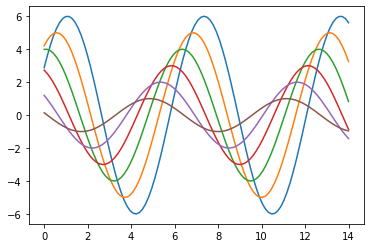

In [6]:
sinplot()

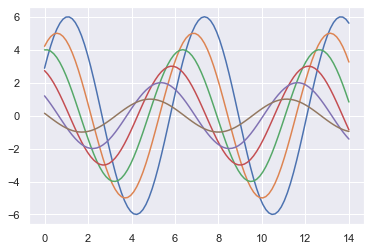

In [7]:
sns.set()
sinplot()

### 5种主题风格

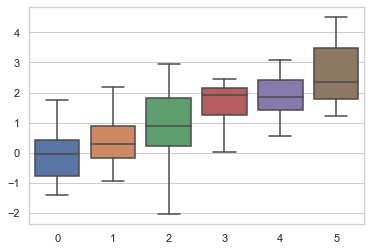

In [10]:
# 白色风格箱线图只有横向刻度线
sns.set_style('whitegrid')
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

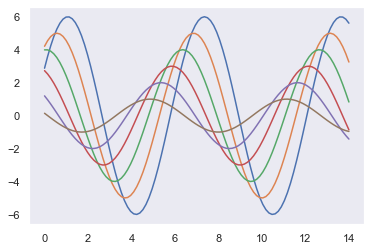

In [11]:
# 暗色背景并且无刻度线
sns.set_style('dark')
sinplot()

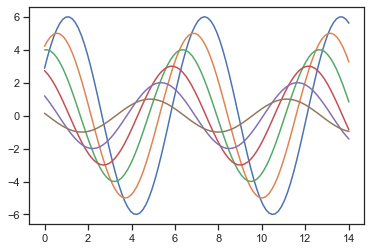

In [12]:
# 坐标轴有刻度线
sns.set_style('ticks')
sinplot()

### 风格细节设置

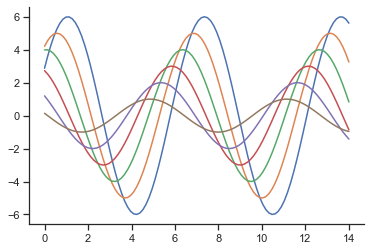

In [13]:
# 去除右侧和上侧坐标轴
sinplot()
sns.despine()

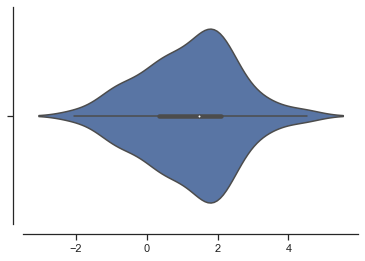

In [14]:
# offset设定离坐标轴的距离
sns.violinplot(data)
sns.despine(offset=10)

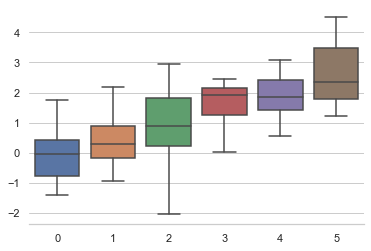

In [25]:
# left左边轴线是否隐藏
sns.set_style('whitegrid')
sns.boxplot(data=data, palette='deep')
sns.despine(left=True)

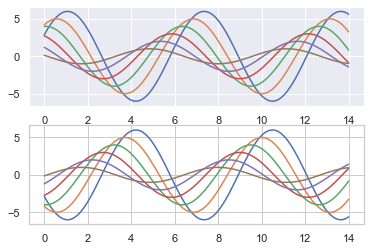

In [26]:
# with域，通过设定使用不同风格展示图像
with sns.axes_style('darkgrid'):
    plt.subplot(211)
    sinplot()
plt.subplot(212)
sinplot(-1)

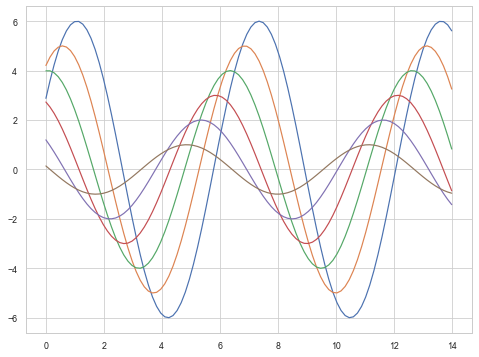

In [29]:
# 设定整体图像大小风格
# 参数设定paper,talk,poster,notebook
sns.set_context('paper')
# sns.set_context('talk')
plt.figure(figsize=(8, 6))
sinplot()

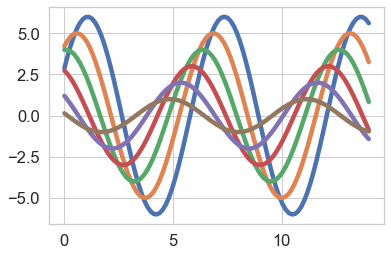

In [32]:
# 除图像大小外，还可以设置字体，线条粗细等
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth': 4.5})
sinplot()

### 颜色设置
颜色有离散型和连续型之分

#### 调色板
* color_palette()支持matplotlib的所有颜色
* color_palette()不写参数则设置为默认颜色
* set_palette()设置所有图的颜色

### 分类色板
6个默认的颜色循环主题:deep,muted,pastel,bright,dark,colorblind

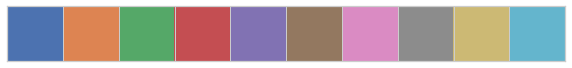

In [33]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

#### 圆形画板
当有6个以上颜色区分需求时，使用hls颜色空间解决

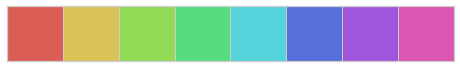

In [34]:
# 传出来8种颜色
sns.palplot(sns.color_palette('hls', 8))

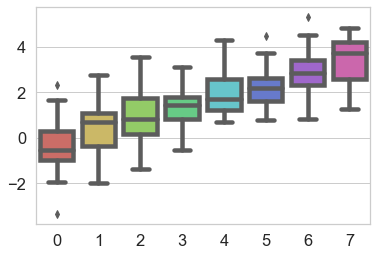

In [35]:
data1 = np.random.normal(size=(20, 8)) + np.arange(8) / 2
sns.boxplot(data=data1, palette=sns.color_palette('hls', 8))

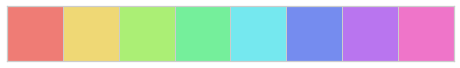

In [39]:
# hls_palette()控制颜色的亮度和饱和度
# l-亮度lightness，s-饱和度saturation
sns.palplot(sns.hls_palette(8, l=.7, s=.8))

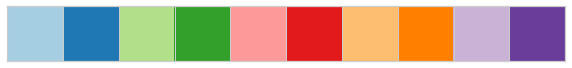

In [43]:
# Paired成对的表示相似的颜色
sns.palplot(sns.color_palette('Paired', 10))

#### 使用xkcd颜色来命名颜色
包含了一套针对随机RGB颜色的命令，调用方式为xkcd_rgb字典中的颜色

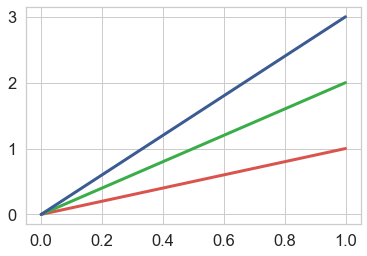

In [44]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb['pale red'], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb['medium green'], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb['denim blue'], lw=3)

### 连续色板
色彩随数据变换，比如数据越重要颜色越深

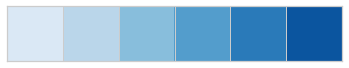

In [45]:
# 由浅到深
sns.palplot(sns.color_palette('Blues'))

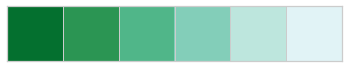

In [46]:
# 由深到浅，加一个_r后缀
sns.palplot(sns.color_palette('BuGn_r'))

#### cubehelix_palette()调色板
色调线性变换

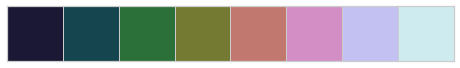

In [47]:
sns.palplot(sns.color_palette('cubehelix', 8))

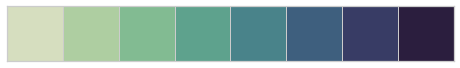

In [49]:
sns.palplot(sns.cubehelix_palette(8, start=.5, rot=-.75))

#### light_palette()和dark_palette()调用定制连续色板

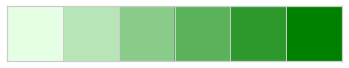

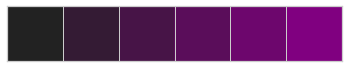

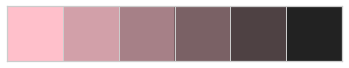

In [51]:
sns.palplot(sns.light_palette('green'))
sns.palplot(sns.dark_palette('purple'))
# 颜色变换反转
sns.palplot(sns.dark_palette('pink', reverse=True))

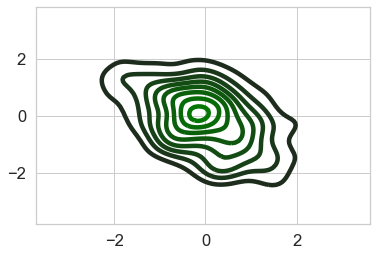

In [56]:
x, y = np.random.multivariate_normal([0,0], [[1, -.5], [-.5, 1]], size=300).T
pal = sns.dark_palette('green', as_cmap=True)
sns.kdeplot(x, y, cmap=pal)